# Praca domowa 3

## Wczytanie danych

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("australia.csv")

In [3]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


Skoro dane są już przygotowane, to daruję sobie sprawdzanie NaNów i innych. Można ewentualnie przeskalować wszystkie wartości liczbowe do 0-1, i zastosować encodingi, ale jako, że to zadanie polega na pokazaniu metryk, to sobię to odpuszczę.

## Podział na zbiory treningowe i walidacyjne

In [4]:
y = np.array(df['RainTomorrow'])
X = df.drop(['RainTomorrow'],axis=1)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=2137
)

## Stworzenie klasyfikatorów i ich nauka

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

lr = LogisticRegression(max_iter=1000)
gnb = GaussianNB(var_smoothing=1e-15)
gbc = GradientBoostingClassifier(random_state=2137,
                                  learning_rate=0.2)

lr.fit(X_train, y_train)
gnb.fit(X_train, y_train)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, random_state=2137)

## Oceny klasyfikatorów

In [6]:
from sklearn import metrics

def rocCfmDetPlotting(clf):
    fig, [ax_roc, ax_cfm, ax_det] = plt.subplots(1, 3, figsize=(20, 5))
    metrics.plot_roc_curve(clf, X_val, y_val, ax=ax_roc)
    metrics.plot_confusion_matrix(clf, X_val, y_val, ax=ax_cfm)
    metrics.plot_det_curve(clf, X_val, y_val, ax=ax_det)
    ax_roc.set_title('ROC curve')
    ax_cfm.set_title('Confussion matrix')
    ax_det.set_title('DET curve')
    ax_roc.grid(linestyle='--')
    ax_det.grid(linestyle='--')
    plt.show()

### Logistic Regression

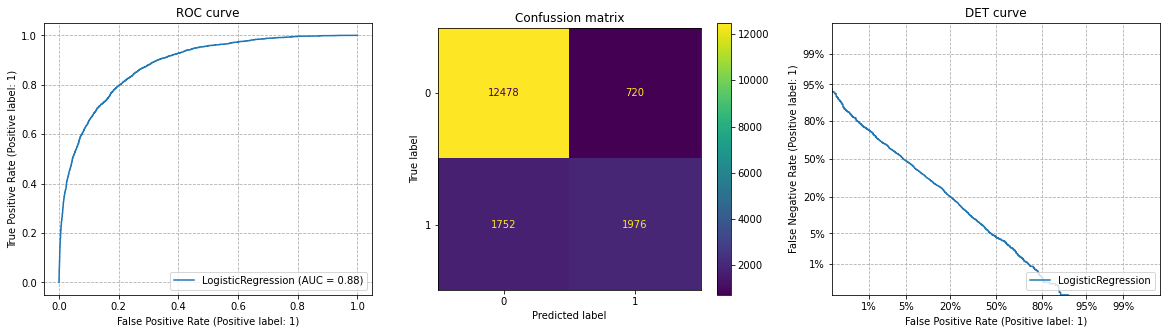

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     13198
           1       0.73      0.53      0.62      3728

    accuracy                           0.85     16926
   macro avg       0.80      0.74      0.76     16926
weighted avg       0.85      0.85      0.84     16926



In [7]:
rocCfmDetPlotting(lr)
temp = metrics.classification_report(y_val, lr.predict(X_val), target_names=['0','1'])
print(temp)

### Gausian NB

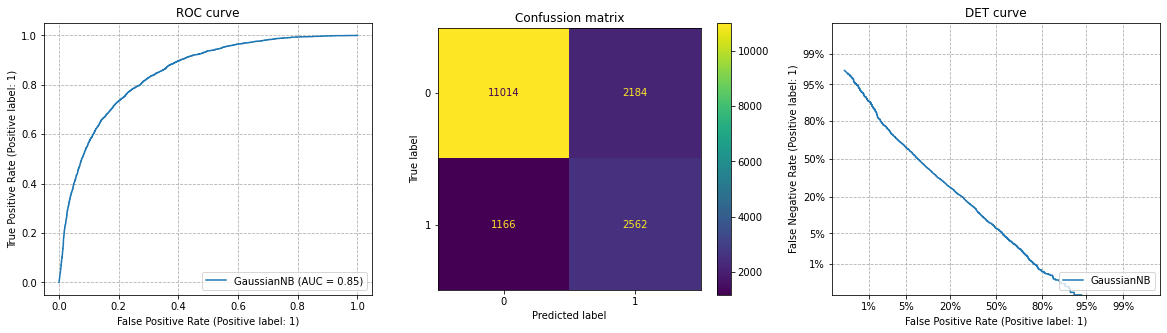

              precision    recall  f1-score   support

           0       0.90      0.83      0.87     13198
           1       0.54      0.69      0.60      3728

    accuracy                           0.80     16926
   macro avg       0.72      0.76      0.74     16926
weighted avg       0.82      0.80      0.81     16926



In [8]:
rocCfmDetPlotting(gnb)
temp = metrics.classification_report(y_val, gnb.predict(X_val), target_names=['0','1'])
print(temp)

### Gradient Boosting Classifier

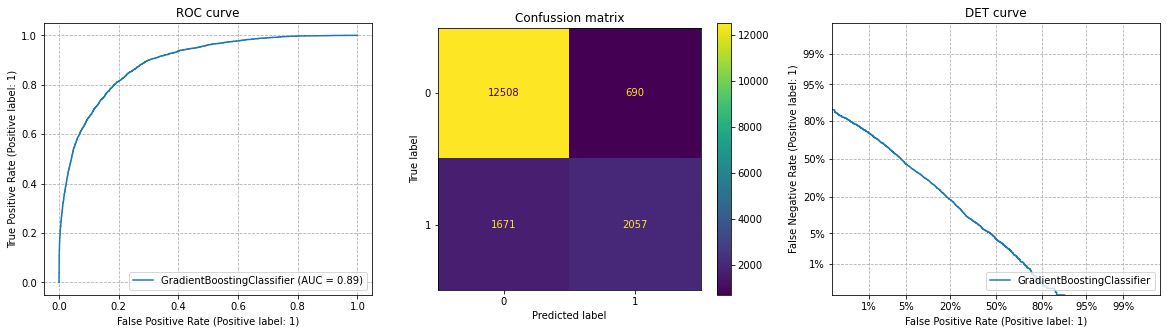

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     13198
           1       0.75      0.55      0.64      3728

    accuracy                           0.86     16926
   macro avg       0.82      0.75      0.77     16926
weighted avg       0.85      0.86      0.85     16926



In [9]:
rocCfmDetPlotting(gbc)
temp = metrics.classification_report(y_val, gbc.predict(X_val), target_names=['0','1'])
print(temp)

## Nałożone ROC i DET

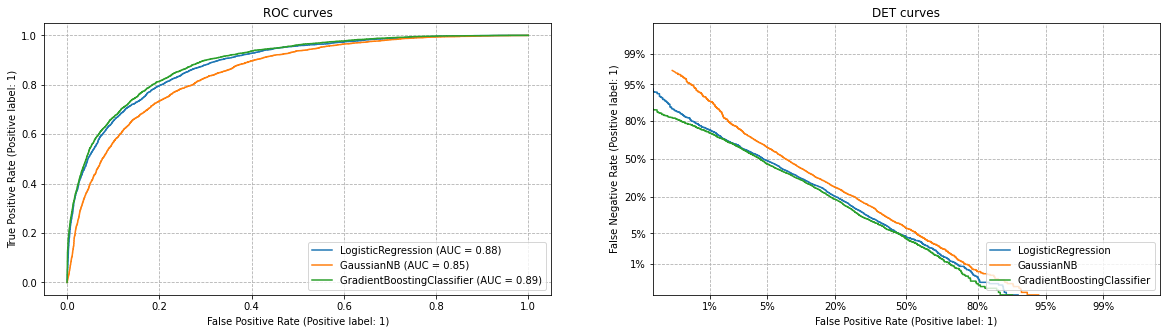

In [10]:
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(20, 5))
clfs = [lr, gnb, gbc]
for clf in clfs:
    metrics.plot_roc_curve(clf, X_val, y_val, ax=ax_roc)
    metrics.plot_det_curve(clf, X_val, y_val, ax=ax_det)
ax_roc.set_title('ROC curves')
ax_det.set_title('DET curves')
ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')
plt.show()

## Wnioski

Nie uważam, że tak łatwo jest wybrać najlepszą metrykę, gdyż są sytuacje, gdzie się może mniej liczyć czelność a samo nieprzegapianie. Wyobraźmy sobie, że w jakimś szpitalu kardiolog ma 1000 zdjęć pacjentów miesięcznie do przeanalizowania. Pewien model, może mieć kiepską celność, powiedzmy 70%, ale może móc (oczywiście czysto teoretycznie) 99.999% wszystkich zachorowań pozytywnie oznaczać. Wtedy, wiadomo, że te nieoznaczone nie są chore i choć ten kardiolog musi jeszcze raz te zdjęcia przejrzeć (często model oznacza niezachorowania jako zachorowania) to musi sprawdzić mniejszą ilość zdjęć, bo tylko w tych wybranych przez klasyfikator moga być zachorowania (99.999% można uznać jako pewne).

Jeżeli chodzi o wybór najlepszego klasyfikiatora, to jest nim Gradient Boosting Classifier, gdyż osiąga najlepsze wyniki podczas raportu precision, recall i f1-score.